In [1]:
import requests
import pandas as pd

In [2]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [3]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-05-04 20:40:33.795474')

In [5]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [6]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [7]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-05-04 21:00:00,28907,28932,28828,28884,40.305214,1.163643e+06
2023-05-04 22:00:00,28896,28915,28810,28855,17.357690,5.010390e+05
2023-05-04 23:00:00,28858,28867,28767,28796,70.656811,2.034863e+06
2023-05-05 00:00:00,28803,28869,28793,28851,7.738464,2.231801e+05
2023-05-05 01:00:00,28860,28971,28841,28947,56.256638,1.626365e+06


<AxesSubplot:xlabel='CloseTime'>

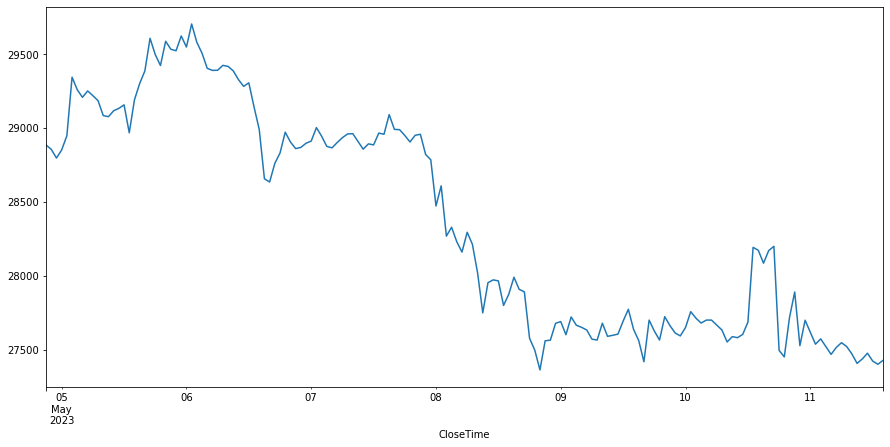

In [8]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [11]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02
mean,28379.203704,28454.549383,28282.030864,28369.851852,79.664734,2.247279e+06
std,737.807842,741.080310,753.870340,740.634999,100.621711,2.794464e+06
min,27358.000000,27447.000000,26842.000000,27363.000000,4.214882,1.157879e+05
25%,27641.000000,27695.250000,27569.000000,27634.250000,26.217711,7.533676e+05
50%,28248.500000,28316.000000,28137.500000,28221.500000,52.250875,1.508551e+06
75%,28973.500000,29051.500000,28919.750000,28970.000000,89.816864,2.520497e+06
max,29701.000000,29851.000000,29558.000000,29703.000000,819.278996,2.245477e+07


In [9]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-05-04 21:00:00,28907,28932,28828,28884,40.305214,1.163643e+06
2023-05-04 22:00:00,28896,28915,28810,28855,17.357690,5.010390e+05
2023-05-04 23:00:00,28858,28867,28767,28796,70.656811,2.034863e+06
2023-05-05 00:00:00,28803,28869,28793,28851,7.738464,2.231801e+05
2023-05-05 01:00:00,28860,28971,28841,28947,56.256638,1.626365e+06


<AxesSubplot:xlabel='CloseTime'>

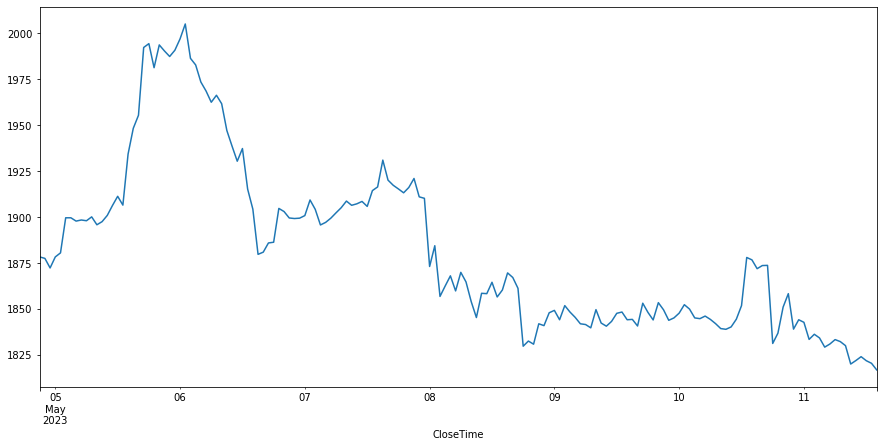

In [10]:
eth['ClosePrice'].plot(figsize=(15, 7))